In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import numpy as np
from scipy.stats import ttest_ind,ttest_rel

In [3]:
df1=pd.read_csv('QVI_purchase_behaviour.csv')

In [4]:
df2=pd.read_csv('QVI_transaction_data.csv')

### Checking datatypes 

In [5]:
#examining transaction data
df2.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [6]:
#checking data types of each column
df2.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [7]:
df1.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

### Changing Datatype of Date Column.

In [8]:
# Function that converts Excel integer into yyyy-mm-dd format

def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(xlserialdate < 60):
        delta_in_days = datetime.timedelta(days = (xlserialdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date

In [9]:
df2['DATE']= df2['DATE'].apply(xlseriesdate_to_datetime)

In [10]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


### Finding outliers

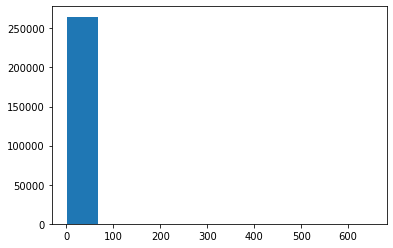

In [12]:
plt.hist(df2.TOT_SALES,bins=10);

c:\users\burug\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


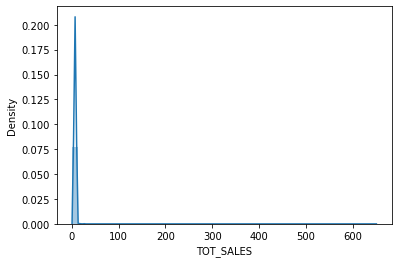

In [13]:
sns.distplot(df2.TOT_SALES);

c:\users\burug\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


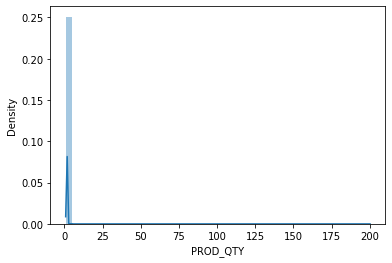

In [14]:
sns.distplot(df2.PROD_QTY);

c:\users\burug\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


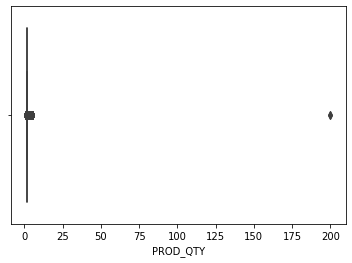

In [15]:
sns.boxplot(df2.PROD_QTY);

c:\users\burug\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


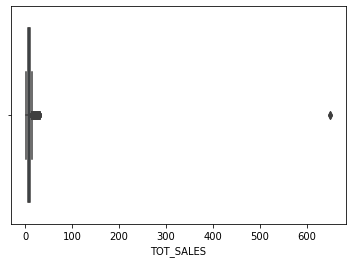

In [16]:
sns.boxplot(df2.TOT_SALES);

By lookin into dots that formed outside of boxplot indicates that there are outliers present in data.

In [17]:
min_threshold,max_threshold= df2.PROD_QTY.quantile([0.001,0.999])
min_threshold,max_threshold

(1.0, 5.0)

In [18]:
df2[(df2.PROD_QTY>max_threshold)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [19]:
df2[(df2.PROD_QTY<min_threshold)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [20]:
df2= df2[(df2.PROD_QTY<max_threshold)]

In [21]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [22]:
min_threshold,max_threshold= df2.TOT_SALES.quantile([0.001,0.99])
min_threshold,max_threshold

(1.5, 13.0)

In [23]:
df2[(df2.TOT_SALES>max_threshold)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
31,2019-05-15,43,43227,40186,26,Pringles Sweet&Spcy BBQ 134g,4,14.8
102,2019-05-15,133,133250,137666,30,Doritos Corn Chips Cheese Supreme 170g,4,17.6
109,2019-05-20,153,153106,152359,30,Doritos Corn Chips Cheese Supreme 170g,3,13.2
124,2019-05-17,168,168219,170719,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,4,15.2
...,...,...,...,...,...,...,...,...
258637,2019-05-19,95,95272,95336,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,3,13.8
258659,2018-08-18,123,123246,127077,104,Infuzions Thai SweetChili PotatoMix 110g,4,15.2
258715,2018-08-16,194,194381,194835,102,Kettle Mozzarella Basil & Pesto 175g,4,21.6
258721,2018-08-15,200,200248,199694,3,Kettle Sensations Camembert & Fig 150g,4,18.4


In [24]:
df2[(df2.TOT_SALES<min_threshold)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [25]:
df2= df2[(df2.TOT_SALES<max_threshold)]

In [26]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


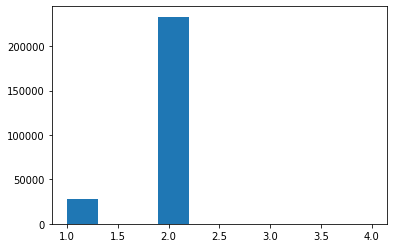

In [27]:
plt.hist(df2.PROD_QTY);


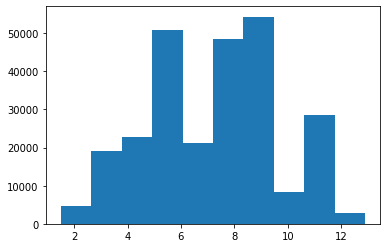

In [28]:
plt.hist(df2.TOT_SALES,bins=10);

c:\users\burug\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


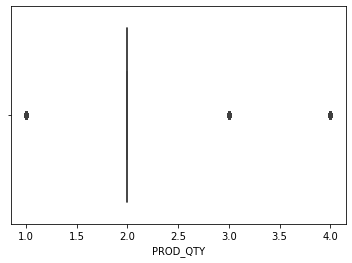

In [29]:
sns.boxplot(df2.PROD_QTY);

c:\users\burug\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


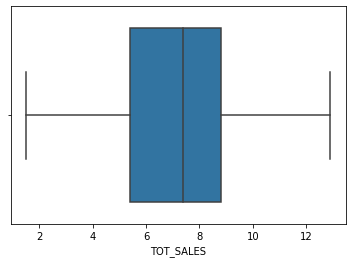

In [30]:
sns.boxplot(df2.TOT_SALES);

In [31]:
df2[['PROD_QTY','TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,261118.000000,261118.000000
mean,1.896729,7.203605
std,0.312901,2.388565
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,4.000000,12.900000


In [32]:
# Extract weights out of 'PROD_NAME'

df2['PACK_SIZE'] = df2['PROD_NAME'].str.extract("(\d+)")
df2['PACK_SIZE'] = pd.to_numeric(df2['PACK_SIZE'])
df2.head()

<ipython-input-32-315b2d0d1f25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PACK_SIZE'] = df2['PROD_NAME'].str.extract("(\d+)")
<ipython-input-32-315b2d0d1f25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PACK_SIZE'] = pd.to_numeric(df2['PACK_SIZE'])


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330


In [33]:
# Create text cleaning function for PROD_NAME feature
def clean_text(text):
    text = re.sub('[&/]', ' ', text) # remove special characters '&' and '/'
    text = re.sub('\d\w*', ' ', text) # remove product weights
    return text

# Apply text cleaning function to PROD_NAME column
df2['PROD_NAME'] = df2['PROD_NAME'].apply(clean_text)

<ipython-input-33-72eda93c0657>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PROD_NAME'] = df2['PROD_NAME'].apply(clean_text)


In [34]:
cleanProdName = df2['PROD_NAME']
string= ''.join(cleanProdName)
prodWord = word_tokenize(string)

In [35]:
wordFrequency = fdist(prodWord)
freq_df = pd.DataFrame(list(wordFrequency.items()), columns = ["Word", "Frequency"]).sort_values(by = 'Frequency', ascending = False)

In [36]:
freq_df.head(5)

,Word,Frequency
10,Chips,49623
49,Kettle,40547
7,Smiths,28503
6,Cheese,27780
19,Salt,24657


In [37]:
ProdName= df2.PROD_NAME

In [38]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150


In [39]:
df2.reset_index(inplace=True)

In [40]:
# removing salsa products
def rowstodelete():
    i=0
    row=[]
    for product in ProdName:
        text = re.search('[Ss]alsa',product)
        if not text==None:
            row.append(i)
        i=i+1
    return row
   
df2.drop(rowstodelete(),inplace=True)
        
        

c:\users\burug\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
df2.drop('index', axis=1,inplace=True)


In [42]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
4,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330
5,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6,210
...,...,...,...,...,...,...,...,...,...
261113,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175
261114,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175
261115,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170
261116,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150


In [43]:
 #Count the number of transactions by date
df2.DATE.value_counts()

2018-12-24    849
2018-12-23    842
2018-12-22    831
2018-12-19    826
2018-12-20    799
             ... 
2019-06-13    597
2019-05-17    586
2018-08-20    581
2019-05-18    578
2019-05-15    575
Name: DATE, Length: 364, dtype: int64

In [44]:
#Number of unique days
df2.DATE.nunique()

#there is one day missing in data 

364

In [45]:
#Looking for missing date

pd.date_range(start='2018-07-01', end='2019-06-30').difference(df2.DATE)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [46]:
a= pd.pivot_table(df2,values='TOT_SALES',index='DATE',aggfunc=sum)

In [47]:
a

,TOT_SALES
DATE,
2018-07-01,4842.1
2018-07-02,4799.0
2018-07-03,4889.7
2018-07-04,4812.1
2018-07-05,4578.0
...,...
2019-06-26,4686.7
2019-06-27,4850.3
2019-06-28,4798.6


In [48]:
#Create a sequence of dates
b= pd.DataFrame(index=pd.date_range(start='2018-07-01', end='2019-06-30'))

In [49]:
b['TOT_SALES']=0

In [50]:
b

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0
...,...
2019-06-26,0
2019-06-27,0
2019-06-28,0
2019-06-29,0


In [51]:
#joining b with a 
c=a+b

In [52]:
c.isnull().values.any()

True

In [53]:
c.fillna(0,inplace=True)

In [54]:
c.isnull().values.any()

False

In [55]:
c

,TOT_SALES
2018-07-01,4842.1
2018-07-02,4799.0
2018-07-03,4889.7
2018-07-04,4812.1
2018-07-05,4578.0
...,...
2019-06-26,4686.7
2019-06-27,4850.3
2019-06-28,4798.6
2019-06-29,5047.6


<AxesSubplot:ylabel='TOT_SALES'>

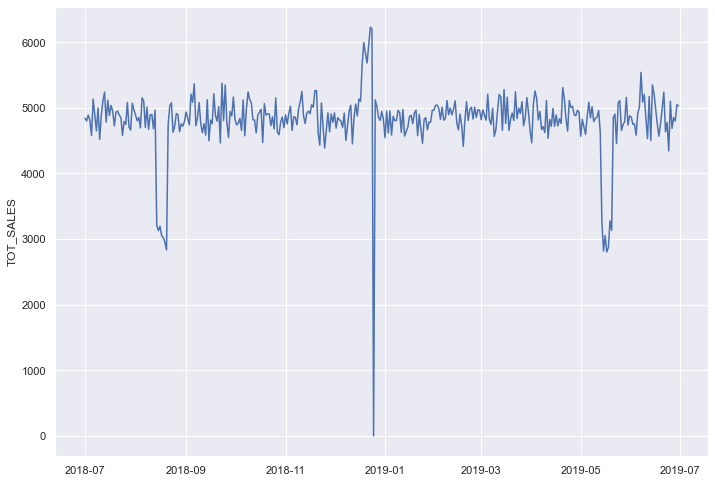

In [56]:
#Plot transactions over time
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=c.index, y=c.TOT_SALES)

In [57]:
c_december = c[(c.index < "2019-01-01") & (c.index > "2018-11-30")]

In [58]:
c_december

,TOT_SALES
2018-12-01,4922.9
2018-12-02,4690.1
2018-12-03,4849.0
2018-12-04,4817.4
2018-12-05,4796.5
2018-12-06,4701.9
2018-12-07,4919.7
2018-12-08,4501.4
2018-12-09,4727.8
2018-12-10,4946.7


<AxesSubplot:ylabel='TOT_SALES'>

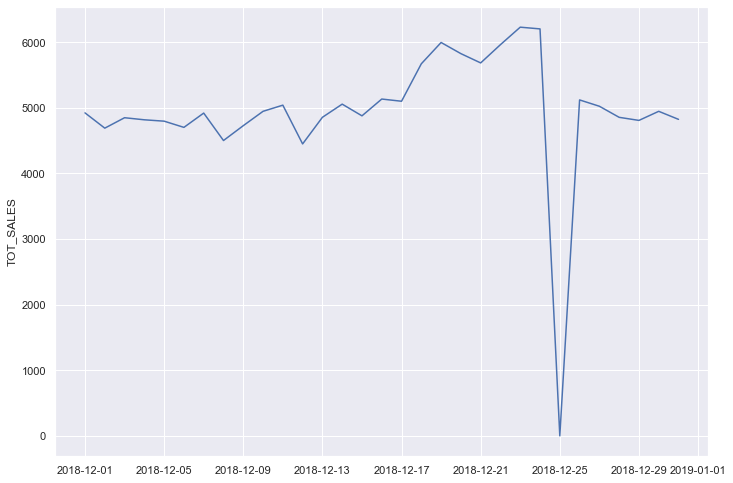

In [59]:
#Plot transactions for december timeperiod
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=c_december.index, y=c_december.TOT_SALES)

In [60]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
4,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330
5,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6,210
...,...,...,...,...,...,...,...,...,...
261113,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175
261114,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175
261115,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170
261116,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150


<AxesSubplot:xlabel='PACK_SIZE', ylabel='Count'>

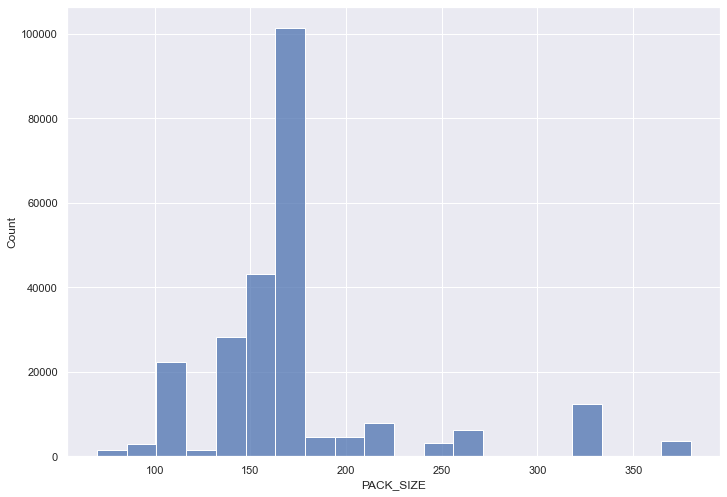

In [61]:
sns.histplot(df2,x='PACK_SIZE',bins=20)

In [62]:
# Creating Brands
df2['Category']=df2['PROD_NAME'].str.extract('([a-zA-Z]+){1,10}')

<ipython-input-62-e41faf5fb0b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Category']=df2['PROD_NAME'].str.extract('([a-zA-Z]+){1,10}')


In [63]:
## Cleaning brand names

df2.replace(to_replace=['WoolWorths','RRD'],value=['Woolworths','Red'],inplace=True)

c:\users\burug\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [64]:
df2['Category'].unique()

array(['Natural', 'CCs', 'Smiths', 'Grain', 'Doritos', 'Twisties', 'WW',
       'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns', 'Kettle', 'Red',
       'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Woolworths', 'Snbts', 'GrnWves',
       'Sunbites'], dtype=object)

In [65]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Category
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
4,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar,1,5.7,330,Smiths
5,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6,210,Grain
...,...,...,...,...,...,...,...,...,...,...
261113,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175,Kettle
261114,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175,Tostitos
261115,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170,Doritos
261116,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150,Doritos


In [66]:
df1

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [67]:
#Merging df1 and df2

merged_df= df2.merge(df1, on='LYLTY_CARD_NBR')

In [68]:
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Category,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
243080,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
243081,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
243082,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
243083,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


### Data Analysis on Customer Segment

Now that the data is ready for analysis, we can define some metrics of interest to
the client:

- Who spends the most on chips (total sales), describing customers by lifestage and
- how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

In [69]:
#Who spends the most on chips (total sales), describing customers by lifestage
spend_pivot = pd.pivot_table(merged_df, values='TOT_SALES',index=['LIFESTAGE','PREMIUM_CUSTOMER'],aggfunc=sum)

In [70]:
spend_pivot

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             32355.60
                       Mainstream         82439.60
                       Premium            52899.55
NEW FAMILIES           Budget             20062.35
                       Mainstream         15544.25
                       Premium            10551.20
OLDER FAMILIES         Budget            152479.25
                       Mainstream         93543.60
                       Premium            73015.50
OLDER SINGLES/COUPLES  Budget            124188.80
                       Mainstream        120954.60
                       Premium           119784.65
RETIREES               Budget            102929.50
                       Mainstream        141414.75
                       Premium            88446.40
YOUNG FAMILIES         Budget            126076.90
                       Mainstream         83902.65
                       Premium            76385.20
YOUNG SINGLES/COUPLES  Budget             55729.60
                       Mainstream        143311.40
                       Premium            38086.80

### Stacked Barplot

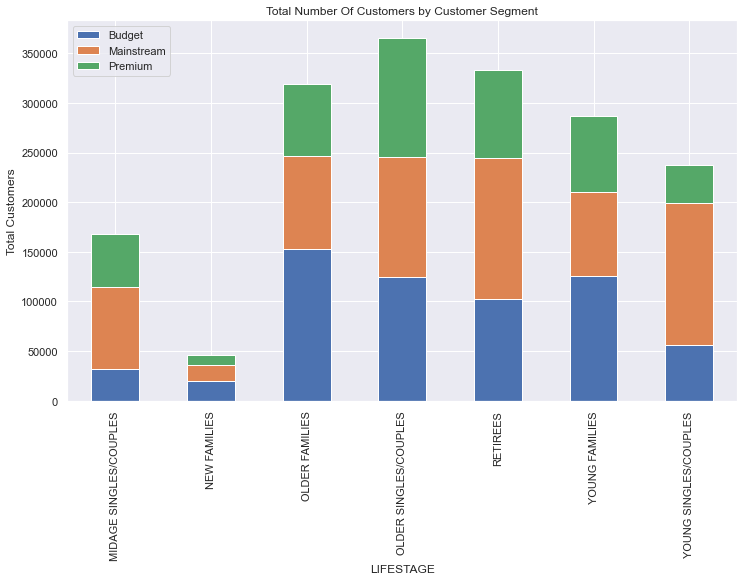

In [71]:
spend_pivot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Number Of Customers by Customer Segment')
plt.ylabel('Total Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Older premium singles/Couples spend most on chips and Newfamilies spend least on chips.

In [72]:
customer_df =pd.DataFrame(merged_df.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())

In [73]:
customer_df.rename(columns={'LYLTY_CARD_NBR':'Number_of_Customers'}, inplace=True)

In [74]:
customer_df.sort_values(by='Number_of_Customers',ascending = False)

Number_of_Customers
LIFESTAGE              PREMIUM_CUSTOMER                     
YOUNG SINGLES/COUPLES  Mainstream                       7865
RETIREES               Mainstream                       6344
OLDER SINGLES/COUPLES  Mainstream                       4838
                       Budget                           4838
                       Premium                          4671
OLDER FAMILIES         Budget                           4601
RETIREES               Budget                           4375
YOUNG FAMILIES         Budget                           3942
RETIREES               Premium                          3800
YOUNG SINGLES/COUPLES  Budget                           3635
MIDAGE SINGLES/COUPLES Mainstream                       3286
OLDER FAMILIES         Mainstream                       2781
YOUNG FAMILIES         Mainstream                       2678
YOUNG SINGLES/COUPLES  Premium                          2471
YOUNG FAMILIES         Premium                          2393
MIDAGE SINGLES/COUPLES Premium                          2360
OLDER FAMILIES         Premium                          2225
MIDAGE SINGLES/COUPLES Budget                           1469
NEW FAMILIES           Budget                           1083
                       Mainstream                        825
                       Premium                           574

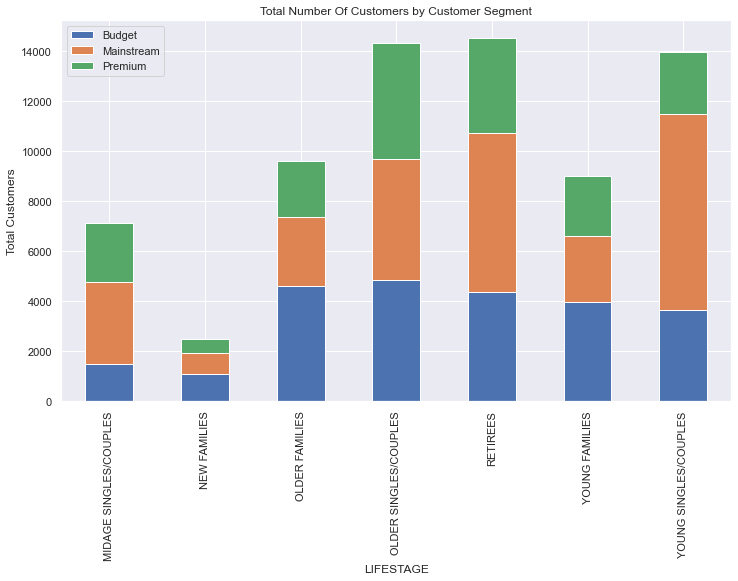

In [75]:
customer_df.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Number Of Customers by Customer Segment')
plt.ylabel('Total Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Young single couples mainstream are largest customer segment followed by retirees mainstream

In [76]:
average_num_df = pd.DataFrame(merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum())

In [77]:
average_num_df['average_no_units'] = (average_num_df['PROD_QTY']/customer_df['Number_of_Customers'])

In [78]:
average_num_df.sort_values(by='average_no_units',ascending=False)

PROD_QTY  average_no_units
LIFESTAGE              PREMIUM_CUSTOMER                            
OLDER FAMILIES         Mainstream           25266          9.085221
                       Budget               41054          8.922843
                       Premium              19815          8.905618
YOUNG FAMILIES         Budget               33804          8.575342
                       Premium              20498          8.565817
                       Mainstream           22722          8.484690
OLDER SINGLES/COUPLES  Budget               32247          6.665358
                       Premium              31027          6.642475
                       Mainstream           31963          6.606656
MIDAGE SINGLES/COUPLES Mainstream           20804          6.331102
RETIREES               Budget               26402          6.034743
                       Premium              22761          5.989737
MIDAGE SINGLES/COUPLES Premium              14119          5.982627
                       Budget                8701          5.923077
RETIREES               Mainstream           37009          5.833701
NEW FAMILIES           Mainstream            3986          4.831515
                       Premium               2734          4.763066
                       Budget                5149          4.754386
YOUNG SINGLES/COUPLES  Mainstream           35505          4.514304
                       Premium              10400          4.208822
                       Budget               15246          4.194223

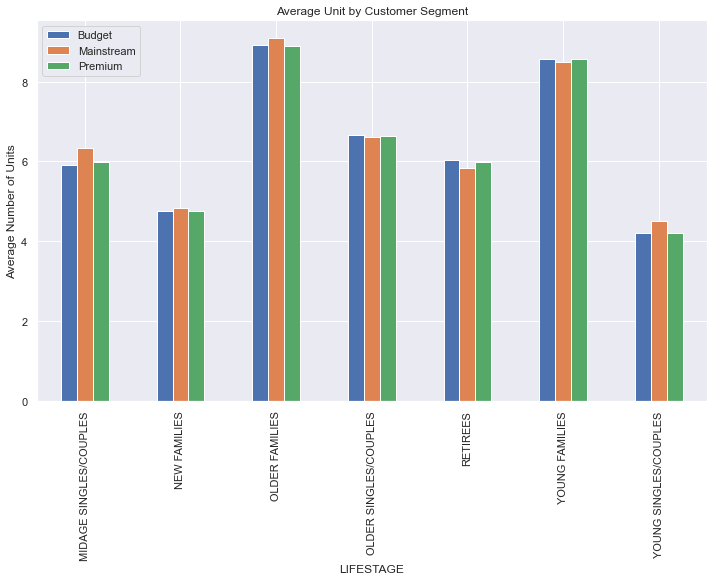

In [79]:
average_num_df['average_no_units'].unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [80]:
average_price_df = pd.DataFrame(spend_pivot.TOT_SALES/average_num_df.PROD_QTY, columns=['Average_Price'])

In [81]:
average_price_df.sort_values(by="Average_Price",ascending=False)

,,Average_Price
LIFESTAGE,PREMIUM_CUSTOMER,
YOUNG SINGLES/COUPLES,Mainstream,4.036372
MIDAGE SINGLES/COUPLES,Mainstream,3.962680
NEW FAMILIES,Mainstream,3.899711
RETIREES,Budget,3.898549
NEW FAMILIES,Budget,3.896359
RETIREES,Premium,3.885875
OLDER SINGLES/COUPLES,Premium,3.860658
NEW FAMILIES,Premium,3.859254
OLDER SINGLES/COUPLES,Budget,3.851174


Young Single couples/Mainstram spending more on each product


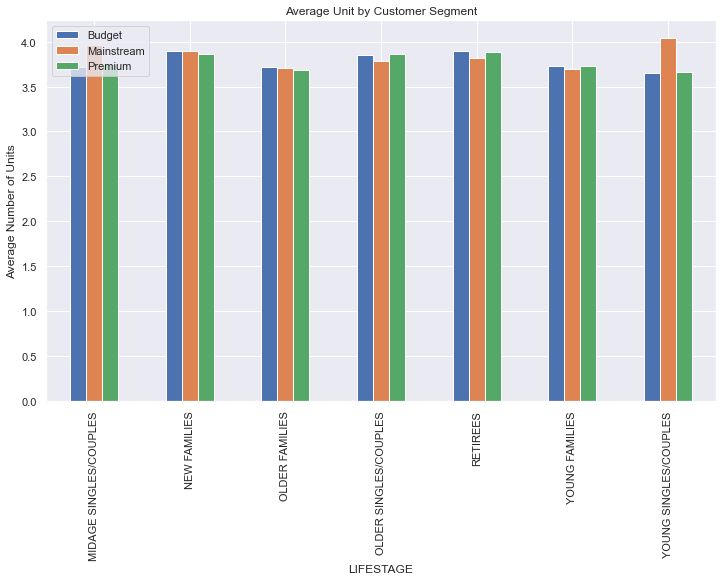

In [82]:
average_price_df.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [85]:
target = merged_df.loc[(merged_df['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (merged_df['PREMIUM_CUSTOMER']=='Mainstream'),:]
non_target = merged_df.loc[(merged_df['LIFESTAGE']!='YOUNG SINGLES/COUPLES') & (merged_df['PREMIUM_CUSTOMER']!='Mainstream'),:]


In [105]:
#Target segment
targetBrand = target.loc[:,['Category','PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY']/targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('Category')['Target Brand Affinity'].sum())

#nonTarget segment
nontargetBrand = non_target.loc[:,['Category','PROD_QTY']]
nontargetSum = nontargetBrand['PROD_QTY'].sum()
nontargetBrand['Non Target Brand Affinity'] = nontargetBrand['PROD_QTY']/nontargetSum
nontargetBrand = pd.DataFrame(nontargetBrand.groupby('Category')['Non Target Brand Affinity'].sum())



In [106]:
Brand_df=targetBrand.merge(nontargetBrand,on='Category')

In [107]:
Brand_df['Affinity To Brand']= Brand_df['Target Brand Affinity']/Brand_df['Non Target Brand Affinity']


In [108]:
Brand_df.sort_values(by='Affinity To Brand',ascending=False)

,Target Brand Affinity,Non Target Brand Affinity,Affinity To Brand
Category,,,
Dorito,0.001155,0.000693,1.666419
Tyrrells,0.032193,0.026042,1.236170
Twisties,0.046867,0.038256,1.225073
Doritos,0.108576,0.089195,1.217293
Infzns,0.015237,0.012737,1.196340
Tostitos,0.046191,0.038651,1.195068
Kettle,0.199803,0.168413,1.186384
Pringles,0.121053,0.102284,1.183506
Grain,0.029601,0.025183,1.175463


Mainstream Young singles/couples are more likely to purchase Dorito chips

In [116]:
#Target segment for pack size
packtargetBrand = target.loc[:,['PACK_SIZE','PROD_QTY']]
packtargetSum = packtargetBrand['PROD_QTY'].sum()
packtargetBrand['Target Pack Affinity'] = packtargetBrand['PROD_QTY']/packtargetSum
packtargetBrand = pd.DataFrame(packtargetBrand.groupby('PACK_SIZE')['Target Pack Affinity'].sum())



In [119]:
#nonTarget segment
packnontargetBrand = non_target.loc[:,['PACK_SIZE','PROD_QTY']]
packnontargetSum = packnontargetBrand['PROD_QTY'].sum()
packnontargetBrand['Non Target Pack Affinity'] = packnontargetBrand['PROD_QTY']/packnontargetSum
packnontargetBrand = pd.DataFrame(packnontargetBrand.groupby('PACK_SIZE')['Non Target Pack Affinity'].sum())


In [120]:
packAffinity_df = packtargetBrand.merge(packnontargetBrand,on='PACK_SIZE')

In [122]:
packAffinity_df['Affinity to pack']= packAffinity_df['Target Pack Affinity']/packAffinity_df['Non Target Pack Affinity']

In [124]:
packAffinity_df.sort_values(by='Affinity to pack', ascending=False)

,Target Pack Affinity,Non Target Pack Affinity,Affinity to pack
PACK_SIZE,,,
380,0.017772,0.013639,1.303077
270,0.032333,0.025218,1.282176
330,0.062273,0.051395,1.211644
110,0.108069,0.090925,1.188550
134,0.121053,0.102284,1.183506
210,0.029601,0.025183,1.175463
135,0.014815,0.013120,1.129191
250,0.014533,0.013039,1.114631
170,0.081960,0.081181,1.009597


Mainstream Young Single/Couple are tend to buy 380 pack size more compared to others

In [126]:
# Which brand offers 270g pack size?

merged_df[merged_df['PACK_SIZE']==270]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,Category,LIFESTAGE,PREMIUM_CUSTOMER
29,2019-05-18,9,9208,8634,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
74,2018-08-24,39,39167,35639,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
115,2019-05-06,54,54305,48304,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
122,2019-05-20,55,55073,48887,113,Twisties Chicken,1,4.6,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
196,2019-01-01,80,80182,78980,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
242836,2018-07-27,259,259034,257623,113,Twisties Chicken,2,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium
242868,2018-10-13,261,261110,260183,15,Twisties Cheese,2,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium
242979,2019-04-04,266,266095,263934,113,Twisties Chicken,1,4.6,270,Twisties,YOUNG SINGLES/COUPLES,Premium
243001,2019-03-29,266,266420,264256,15,Twisties Cheese,2,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium


In [133]:
# Is Twisties the only brand who sells 270g pack size?
merged_df.loc[merged_df['PACK_SIZE']==270, 'Category'].unique()

array(['Twisties'], dtype=object)

Twisties is the only brand which sells 270g pack

## Conclusion

- Sales are highest for (Budget, OLDER FAMILIES), (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES)
- We found that (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) are mainly due to the fact that there are more customers in these segments
- (Mainstream, YOUNG SINGLES/COUPLES) are more likely to pay more per packet of chips than their premium and budget counterparts
- They are also more likely to purchase 'Doritoes' and '380g' pack sizes than the rest of the population